<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine2/blob/main/WOMAC_Regression_Version100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.29_Final_W-tempo-spatial.csv")


In [127]:
dataset.head(10)

,Patient ID,WOMAC_total,WOMAC Severity,DataType,CCI_TA-RF,CCI_G-MH,CCI_TA-MH,CCI_G-RF,CCI_TA-G,CCI_MH-RF,...,Lyapunov_TIBIALIS ANT,Stance_CCI_TA-RF,Stance_CCI_G-MH,Stance_CCI_TA-G,Swing_CCI_TA-RF,Swing_CCI_G-MH,Swing_CCI_TA-G,swing/stance_cci(TA_RF),swing/stance_cci(G-MH),swing/stance_CCI(TA-G)
0,13308,22,Mild,Training,49.2,92.1,51.8,101.6,91.7,88.8,...,0.20,48.935608,120.815090,86.949185,49.662771,30.602679,101.914340,1.014860,0.253302,1.172114
1,13489,35,Mild,Training,116.0,232.8,104.6,225.5,79.7,120.1,...,0.26,52.187204,244.146045,46.506634,189.255449,211.104414,134.602751,3.626472,0.864664,2.894270
2,13489,35,Mild,Training,101.4,55.7,76.0,63.9,122.8,74.3,...,0.25,70.259125,70.225682,75.729112,141.818740,28.911669,211.453368,2.018510,0.411697,2.792234
3,13532,33,Mild,Training,139.7,46.0,69.5,88.5,169.0,35.8,...,0.30,151.986792,28.925641,219.105386,123.184526,78.659590,70.327124,0.810495,2.719372,0.320974
4,13549,30,Mild,Training,113.5,40.2,112.2,38.5,276.0,107.6,...,0.40,145.992226,53.319007,377.515540,79.111070,20.960417,121.125857,0.541885,0.393113,0.320850
5,13603,24,Mild,Training,138.9,46.9,88.5,75.0,196.4,59.9,...,0.30,117.810653,73.077828,110.776839,162.105887,12.947782,332.512464,1.375987,0.177178,3.001642
6,13603,24,Mild,Training,115.7,116.3,59.4,98.7,105.5,111.5,...,0.20,145.036660,170.309456,111.502357,81.943900,28.319855,95.662700,0.564987,0.166285,0.857943
7,14017,27,Mild,Training,120.9,117.8,148.3,111.1,134.5,113.2,...,0.20,112.554201,129.825565,113.366679,131.194966,96.447210,172.600617,1.165616,0.742898,1.522499
8,14315,22,Mild,Training,383.6,90.8,248.2,116.0,316.6,71.2,...,0.50,272.857378,113.760720,269.374236,527.035183,53.072994,405.670765,1.931541,0.466532,1.505975
9,14320,32,Mild,Training,516.5,112.9,476.1,120.8,642.5,53.6,...,0.51,450.214119,168.273023,322.676333,602.362752,18.657880,1245.728157,1.337947,0.110879,3.860612


In [128]:
dataset.shape

(150, 88)

In [129]:
X = dataset.iloc[:,4:]
y = dataset.iloc[:, 1]

In [130]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

In [131]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)

In [132]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [133]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [134]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 20


In [135]:
imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

                      Specs     Score
80           Swing_CCI_TA-G  3.824733
81  swing/stance_cci(TA_RF)  3.055398
12                Step_Time  2.256754
11              Step_Length  2.011332
10            Stride_Length  1.991660
8                   Cadence  1.916946
34     Max-Min T_MEDIAL HAM  1.815930
83   swing/stance_CCI(TA-G)  1.724589
58     Lin_reg_TIBIALIS ANT  1.650605
3                  CCI_G-RF  1.594176
9                     Speed  1.547062
53            Average_AUC_F  1.430273
26         Max T_MEDIAL HAM  1.401292
4                  CCI_TA-G  1.314952
71          Lyapunov_RECTUS  1.311960
43       Average_Integral_U  1.311572
46              Area_RECTUS  1.310099
67            Stddev_RECTUS  1.277695
78          Swing_CCI_TA-RF  1.240789
21               Min_RECTUS  1.237807


In [136]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

In [137]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 1]

In [138]:
X_train=X_new.iloc[:120,:]  
X_test=X_new.iloc[120:,:]
y_train=y_new.iloc[:120]
y_test=y_new.iloc[120:]

In [139]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


#Taining Ploting and Result

In [140]:
y_pred_train = lin_reg.predict(X_train)

print(y_pred.shape)
from sklearn.metrics import r2_score,mean_squared_error
print("Training r2: ",r2_score(y_train,y_pred_train))


r_sq = lin_reg.score(X_new, y_new)
print("Training r_sq: ",r_sq)





(30,)
Training r2:  0.3504371595516771
Training r_sq:  0.28643546435777734


In [141]:
r_sq_train = lin_reg.score(X_train, y_pred_train)
print(r_sq_train)

1.0


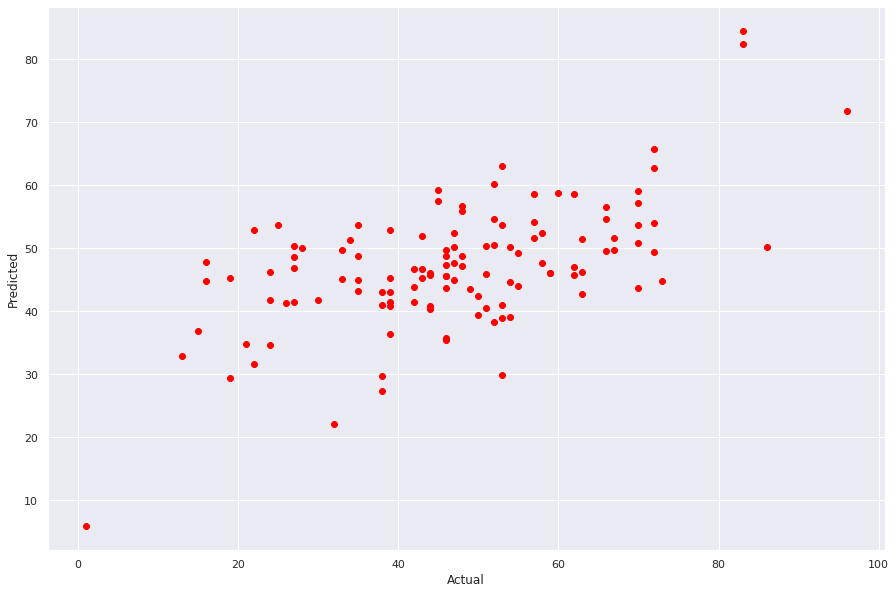

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred_train, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [143]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_train,
        "Predicted Value":y_pred_train,
        "Difference":y_train-y_pred_train
    }
)

pred_y_df

,Actual Value,Predicted Value,Difference
0,22,52.886939,-30.886939
1,35,53.727545,-18.727545
2,35,44.903778,-9.903778
3,33,45.039285,-12.039285
4,30,41.703786,-11.703786
...,...,...,...
115,86,50.173266,35.826734
116,70,53.743844,16.256156
117,96,71.765808,24.234192
118,67,51.574739,15.425261


In [144]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred_train))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred_train))



Mean squared error: 184.07
Coefficient of determination: 0.35


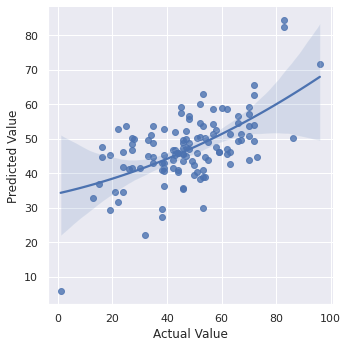

In [145]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)



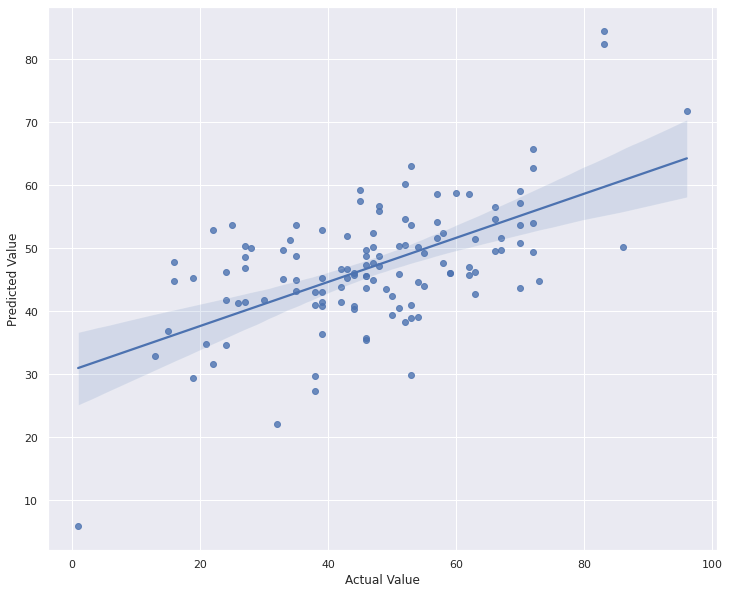

In [146]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);




#Testing Ploting and Result

In [147]:
y_pred_test = lin_reg.predict(X_test)


from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred_test))

r_sq = lin_reg.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  0.09286082115916094
R_sq:  0.28643546435777734


In [148]:
r_sq_test = lin_reg.score(X_test, y_pred_test)
print(r_sq_test)

1.0


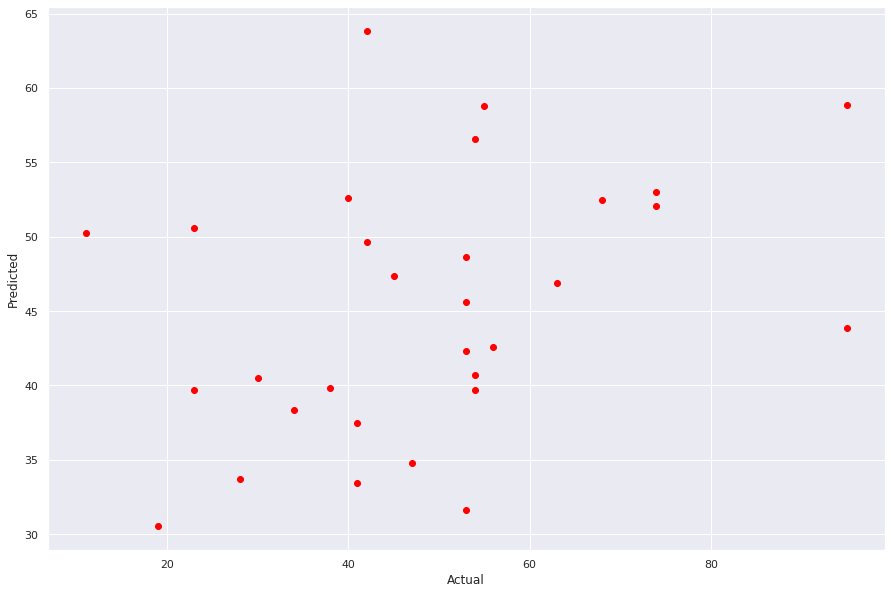

In [149]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred_test, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [150]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_test,
        "Predicted Value":y_pred_test,
        "Difference":y_test-y_pred_test
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
120,23,39.686181,-16.686181
121,19,30.577361,-11.577361
122,11,50.247300,-39.247300
123,30,40.508047,-10.508047
124,23,50.598816,-27.598816
125,34,38.349999,-4.349999
126,28,33.679684,-5.679684
127,40,52.589305,-12.589305
128,42,63.798660,-21.798660
129,42,49.652310,-7.652310


In [151]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_test))


Mean squared error: 345.60
Coefficient of determination: 0.09


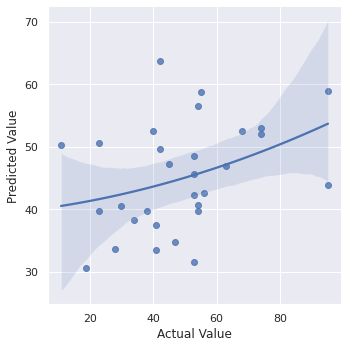

In [152]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)

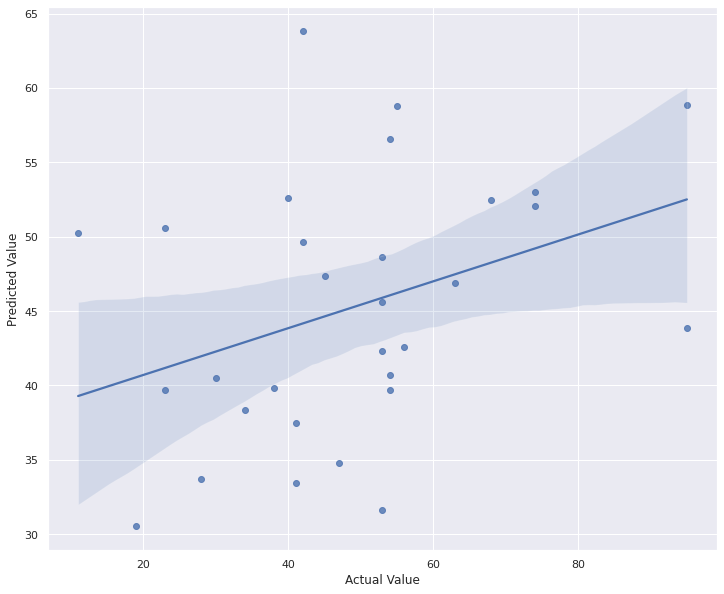

In [153]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);